
# Logistic Regression — Decision Boundaries & Hyperparameters

This notebook generates a synthetic 2D dataset and visualizes **Logistic Regression** decision boundaries for multiple configurations:

1) Baseline: L2 penalty, `C=1.0`, solver=`lbfgs`  
2) Regularization strength sweep: `C ∈ {0.1, 1, 10, 100}` (L2)  
3) L1 vs L2 penalties (with appropriate solvers)  
4) Elastic Net (`saga`, `l1_ratio ∈ {0.2, 0.5, 0.8}`)  
5) Class weighting: `class_weight='balanced'`  
6) Polynomial feature expansion: degree 2 (to capture simple nonlinearity)

Each configuration is trained in a pipeline (scaling + model) and plotted with:
- **Decision regions** (filled by predicted class)
- **Probability contours** (0.5 boundary plus calibrated-looking probabilities from LR)
- **Training and test points**


In [1]:

import numpy as np
import matplotlib.pyplot as plt, warnings

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(11)
warnings.filterwarnings("ignore")

# Generate a nonlinear dataset to show the limits of plain linear LR
X, y = make_moons(n_samples=200, noise=0.5, random_state=11)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=11, stratify=y
)

def plot_boundary(clf, X_tr, y_tr, X_te, y_te, title):
    # Grid
    x_min, x_max = X[:,0].min()-0.8, X[:,0].max()+0.8
    y_min, y_max = X[:,1].min()-0.8, X[:,1].max()+0.8
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    XY = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities for class 1
    P = clf.predict_proba(XY)[:,1].reshape(xx.shape)

    # Plot decision regions and probability contours
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, P>=0.5, alpha=0.15)
    # Probability levels for visual intuition
    CS = plt.contour(xx, yy, P, levels=[0.1,0.3,0.5,0.7,0.9], linestyles=["--","--","-","--","--"])
    plt.clabel(CS, inline=True, fontsize=8, fmt="p=%.1f")

    # Points
    plt.scatter(X_tr[:,0], X_tr[:,1], s=12, alpha=0.7, label="train")
    plt.scatter(X_te[:,0], X_te[:,1], s=16, alpha=0.9, marker="x", label="test")

    acc_tr = accuracy_score(y_tr, clf.predict(X_tr))
    acc_te = accuracy_score(y_te, clf.predict(X_te))
    plt.title(f"{title}")
    print(f"{title}\naccuracy(train)={acc_tr:.3f} | accuracy(test)={acc_te:.3f}")
    plt.xlabel("x1"); plt.ylabel("x2"); plt.legend(loc="lower right")
    plt.tight_layout(); plt.show()


## 1) Baseline: L2, C=1.0, solver=lbfgs

LogReg L2, C=1.0 (lbfgs)
accuracy(train)=0.800 | accuracy(test)=0.780


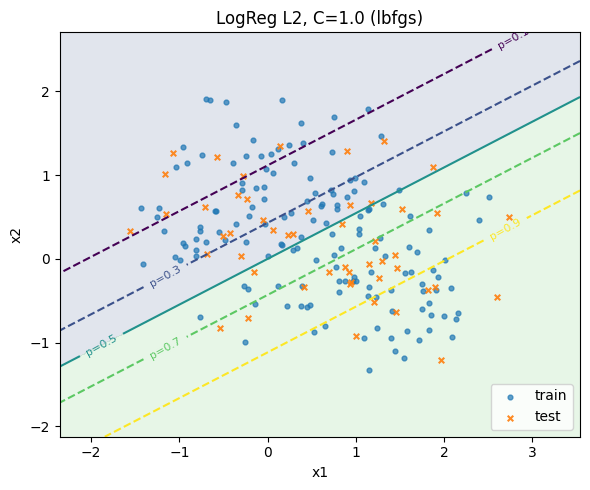

In [2]:

clf_base = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=2000, random_state=11)
)
clf_base.fit(X_train, y_train)
plot_boundary(clf_base, X_train, y_train, X_test, y_test, "LogReg L2, C=1.0 (lbfgs)")


## 2) L2 Regularization Strength: C ∈ {0.1, 1, 10, 100}

LogReg L2, C=0.1 (lbfgs)
accuracy(train)=0.807 | accuracy(test)=0.780


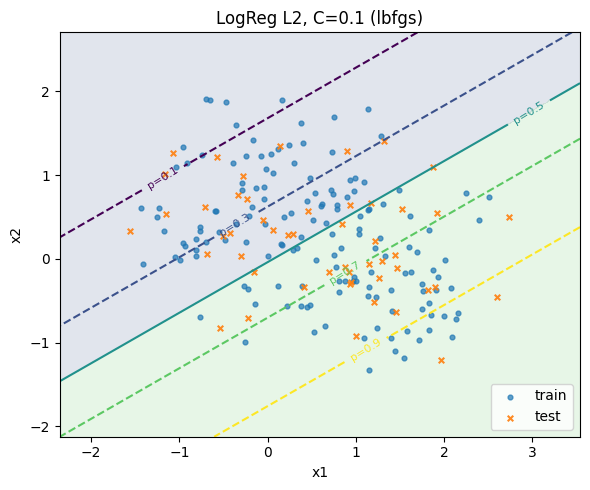

LogReg L2, C=1 (lbfgs)
accuracy(train)=0.800 | accuracy(test)=0.780


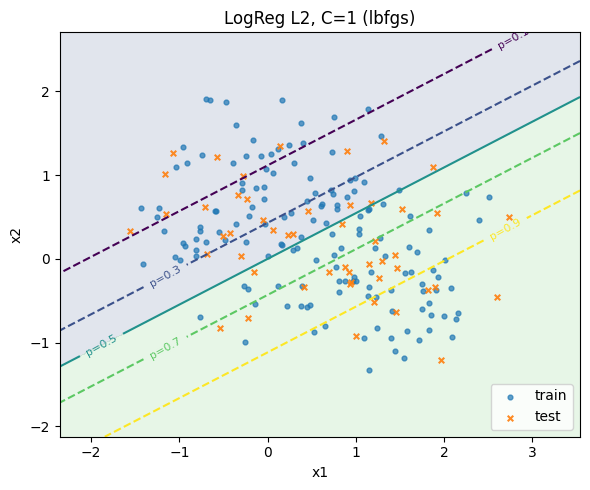

LogReg L2, C=10 (lbfgs)
accuracy(train)=0.800 | accuracy(test)=0.780


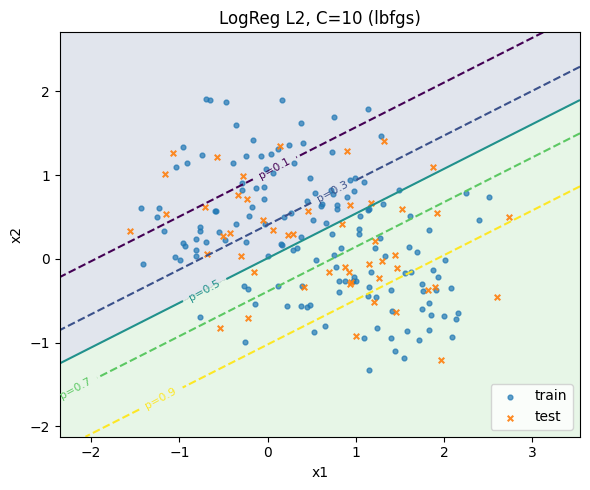

LogReg L2, C=100 (lbfgs)
accuracy(train)=0.800 | accuracy(test)=0.780


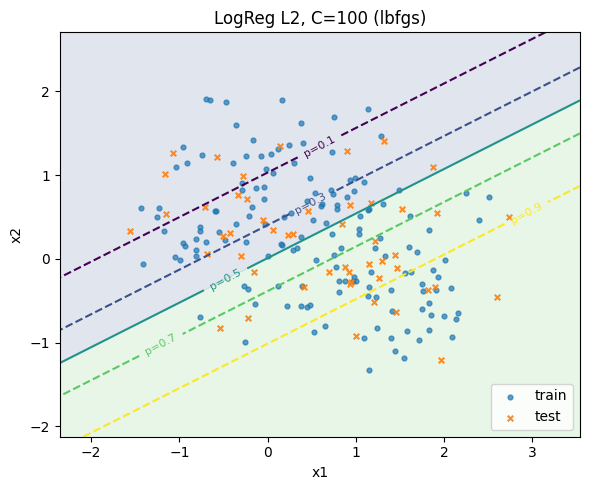

In [3]:

for C in [0.1, 1, 10, 100]:
    clf = make_pipeline(
        StandardScaler(),
        LogisticRegression(penalty="l2", C=C, solver="lbfgs", max_iter=2000, random_state=11)
    )
    clf.fit(X_train, y_train)
    plot_boundary(clf, X_train, y_train, X_test, y_test, f"LogReg L2, C={C} (lbfgs)")


## 3) Penalty: L1 vs L2

LogReg L1, C=1.0 (liblinear)
accuracy(train)=0.807 | accuracy(test)=0.780


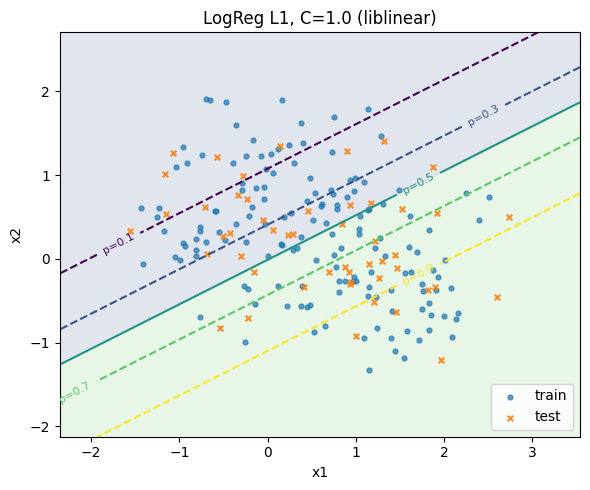

LogReg L2, C=1.0 (lbfgs)
accuracy(train)=0.800 | accuracy(test)=0.780


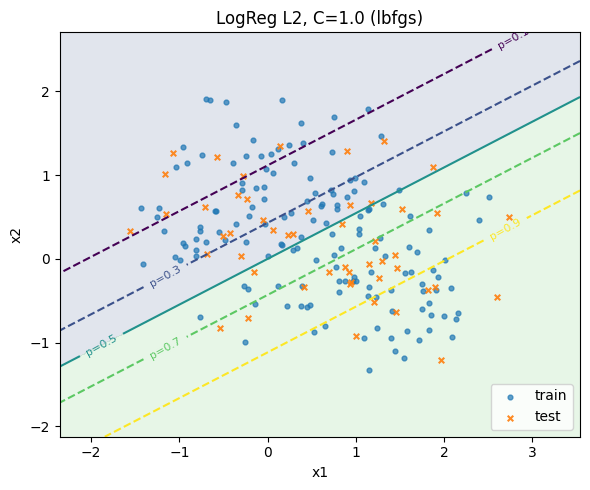

In [4]:

# L1 requires a solver that supports it; use 'liblinear' (binary) or 'saga'
clf_l1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty="l1", C=1.0, solver="liblinear", max_iter=2000, random_state=11)
)
clf_l1.fit(X_train, y_train)
plot_boundary(clf_l1, X_train, y_train, X_test, y_test, "LogReg L1, C=1.0 (liblinear)")

clf_l2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=2000, random_state=11)
)
clf_l2.fit(X_train, y_train)
plot_boundary(clf_l2, X_train, y_train, X_test, y_test, "LogReg L2, C=1.0 (lbfgs)")


## 4) Elastic Net (saga) — l1_ratio ∈ {0.2, 0.5, 0.8}

Elastic Net (saga), l1_ratio=0.2, C=1.0
accuracy(train)=0.800 | accuracy(test)=0.780


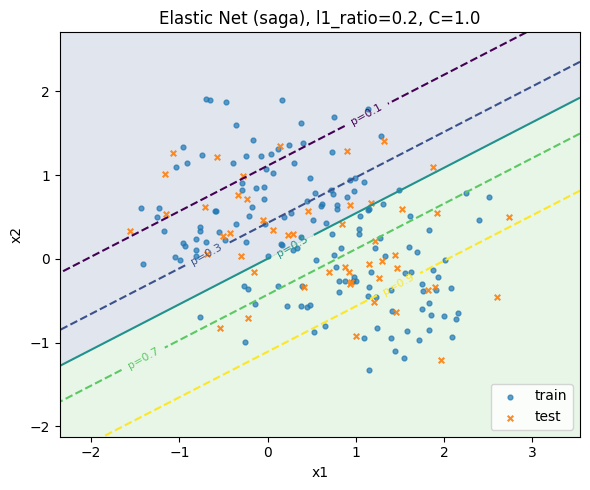

Elastic Net (saga), l1_ratio=0.5, C=1.0
accuracy(train)=0.800 | accuracy(test)=0.780


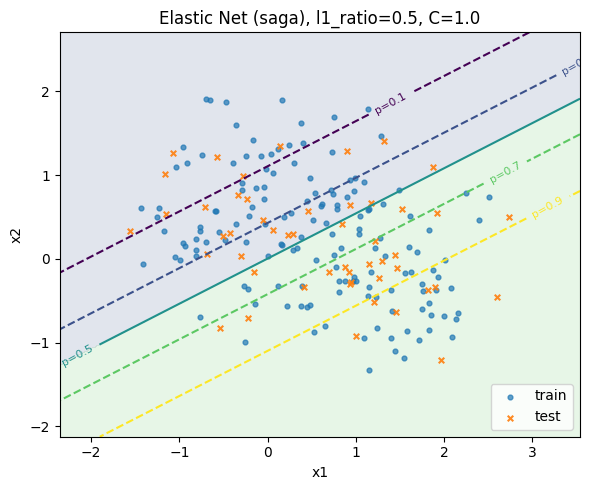

Elastic Net (saga), l1_ratio=0.8, C=1.0
accuracy(train)=0.800 | accuracy(test)=0.780


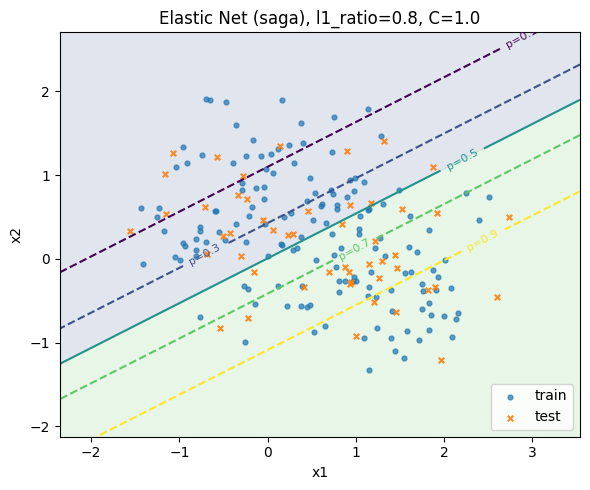

In [5]:

for r in [0.2, 0.5, 0.8]:
    clf = make_pipeline(
        StandardScaler(),
        LogisticRegression(
            penalty="elasticnet", solver="saga", l1_ratio=r,
            C=1.0, max_iter=4000, random_state=11
        )
    )
    clf.fit(X_train, y_train)
    plot_boundary(clf, X_train, y_train, X_test, y_test, f"Elastic Net (saga), l1_ratio={r}, C=1.0")


## 5) Class Weighting: balanced

LogReg L2, C=1.0, class_weight=balanced
accuracy(train)=0.800 | accuracy(test)=0.780


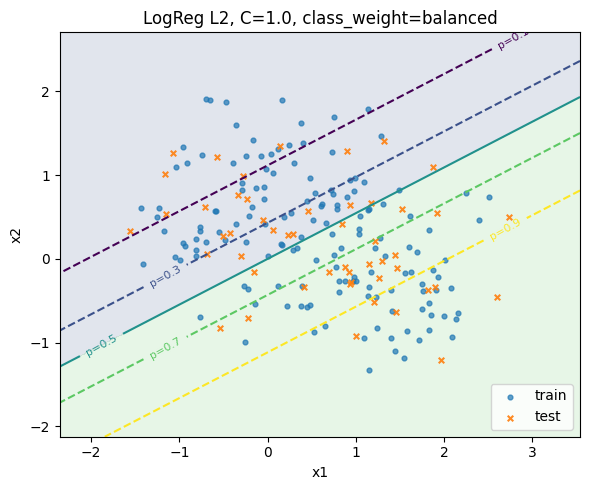

In [6]:

clf_bal = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", class_weight="balanced",
                       max_iter=2000, random_state=11)
)
clf_bal.fit(X_train, y_train)
plot_boundary(clf_bal, X_train, y_train, X_test, y_test, "LogReg L2, C=1.0, class_weight=balanced")


## 6) Polynomial Features (degree=2) + Logistic Regression

PolyFeatures(deg=2) + LogReg L2, C=1.0
accuracy(train)=0.800 | accuracy(test)=0.780


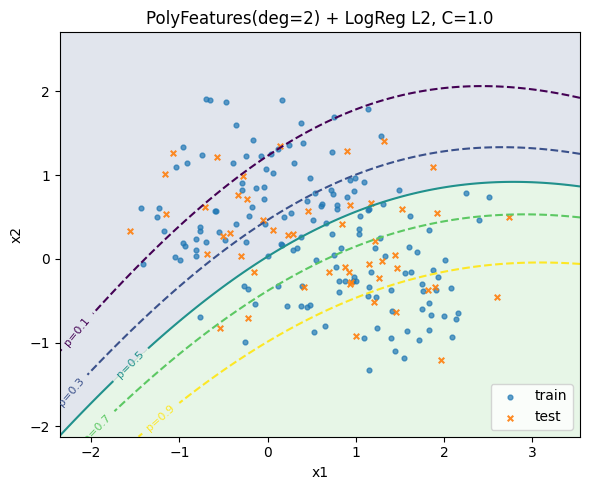

In [7]:

# Pipeline: Standardize -> PolynomialFeatures -> Standardize -> LR
clf_poly2 = Pipeline([
    ("scaler1", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler2", StandardScaler(with_mean=False)),  # sparse-like output after poly
    ("lr", LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=4000, random_state=11))
])
clf_poly2.fit(X_train, y_train)

# Reuse the same plotter (works with any pipeline that exposes predict_proba)
plot_boundary(clf_poly2, X_train, y_train, X_test, y_test, "PolyFeatures(deg=2) + LogReg L2, C=1.0")
